In [1]:
!pip install xgboost


     -------------------------------------- 99.8/99.8 MB 903.6 kB/s eta 0:00:00


In [2]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
import torch as th
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kstest
from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import nbinom
from scipy.stats import gamma
from scipy.stats import chi2_contingency
import scipy.stats as stats
import random
from scipy.stats import mannwhitneyu
#import scanpy as sc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
import plotly


c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [4]:
df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')


In [5]:
df_seq_HFiltNorm.head()
df_seq_HFiltNorm.shape

(3000, 182)

In [6]:
df_seq_HfiltNormT = df_seq_HFiltNorm.T
df_seq_HfiltNormT.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [7]:
#we now add the target variable
df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')
df_metaH.set_index('Filename', inplace=True)
merged_df = pd.merge(df_seq_HfiltNormT, df_metaH['Condition'], left_index=True, right_index=True)
print(merged_df.columns)

Index(['DDIT4', 'ANGPTL4', 'CALML5', 'KRT14', 'CCNB1', 'IGFBP3', 'AKR1C2',
       'KRT6A', 'NDRG1', 'KRT4',
       ...
       'ZYG11A', 'NRG1', 'RBMS3', 'VCPIP1', 'LINC02693', 'OR8B9P', 'NEAT1',
       'ZDHHC23', 'ODAD2', 'Condition'],
      dtype='object', length=3001)


In [8]:
merged_df.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2,Condition
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,10,136,0,0,29,0,29,0,0,Normo
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,0,264,0,134,68,0,213,0,0,Hypo
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,0,38,0,0,0,0,92,0,0,Hypo
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,0,16,0,4,1,0,1,0,0,Hypo
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,1,25,0,0,0,0,128,0,0,Hypo


In [9]:
# Now transform the categorical variable 'Condition' to numerical
dummy_variables = pd.get_dummies(merged_df['Condition'], prefix='category').astype('int')
merged = pd.concat([merged_df, dummy_variables], axis=1)
print(merged.head())
merged.drop(columns=['category_Hypo', 'Condition'], inplace=True)
merged.rename(columns={'category_Normo': 'Target'}, inplace=True)
# Note that 1 = Norm, 0 = Hypo

                                                    DDIT4  ANGPTL4  CALML5  \
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.s...      0       48       0   
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.so...   8739     2101      55   
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sort...  13098    14032       0   
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sort...   2880      356       0   
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.so...   7777     5661    4383   

                                                    KRT14  CCNB1  IGFBP3  \
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.s...    321    298      82   
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.so...     96   1824    1938   
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sort...      0   1616     247   
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sort...   6211      3    3430   
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.so...      0    145    4618   

                                                    AKR1C2  KRT6A  NDRG1  

In [10]:
print(merged['Target'])

output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam     1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam      0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam        0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam        0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam      0
                                                                       ..
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    1
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    1
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      0
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     1
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     1
Name: Target, Length: 182, dtype: int32


In [11]:
#now we implement xgboost
X = merged.drop(columns=['Target'])
y = merged['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
# Convert the dataset into DMatrix format, which is required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'max_depth': 3,  # Maximum depth of a tree
    'objective': 'multi:softmax',  # Objective function for classification
    'num_class': 3,  # Number of classes
    'eta': 0.3,  # Learning rate
    'eval_metric': 'merror'  # Evaluation metric
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
predictions = model.predict(dtest)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 1.0


In [13]:
#now we implement cross-validation
# Instantiate StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform k-fold cross-validation
cv_results = cross_val_score(xg_cl, X, y, cv=kfold, scoring='accuracy')


In [14]:
# Print the results
print('Accuracy:', cv_results)
print('Average accuracy:', cv_results.mean())


Accuracy: [0.94594595 0.97297297 0.91666667 1.         1.        ]
Average accuracy: 0.9671171171171171


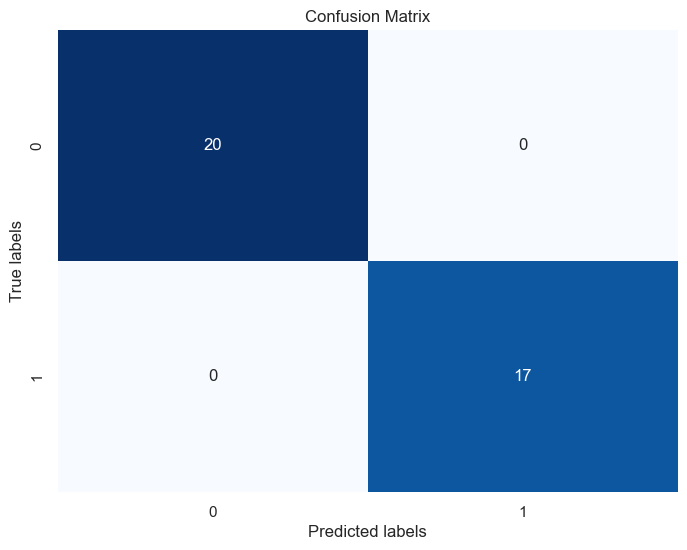

<Figure size 1000x600 with 0 Axes>

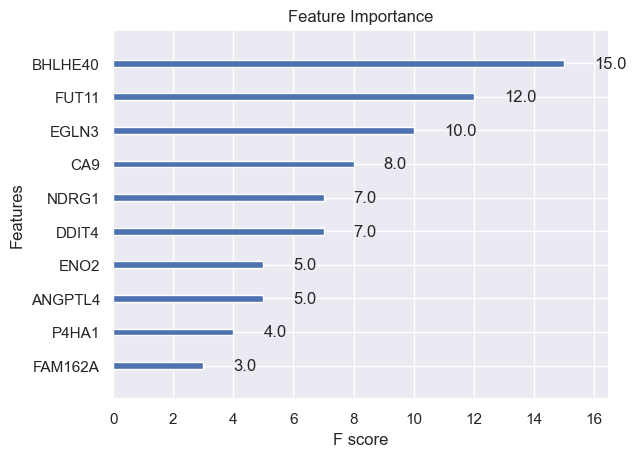

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)  # You can adjust max_num_features as per your preference
plt.title("Feature Importance")
plt.show()


{'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 50, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.30000000000000004, 'gamma': 0.0, 'colsample_bytree': 0.5}
0.9836336336336338
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.30000000000000004,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 1.0


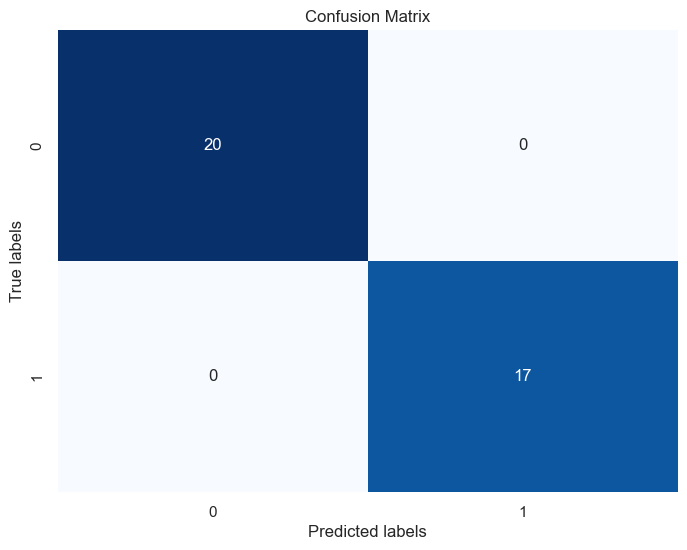

<Figure size 1000x600 with 0 Axes>

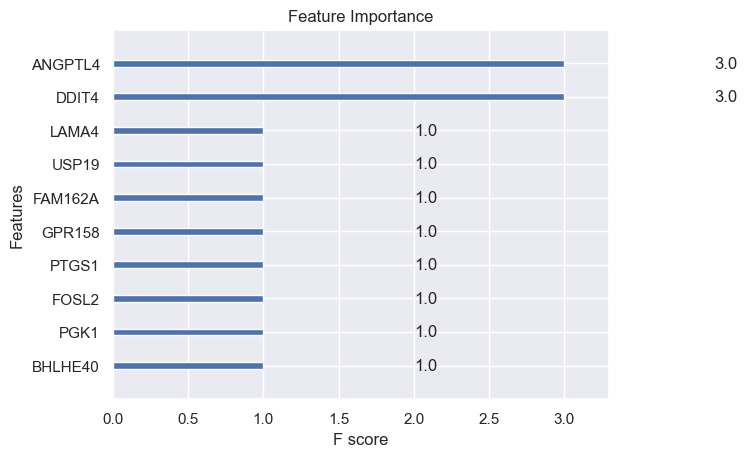

In [17]:
#now we implement hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': range(3, 10),
    'learning_rate': np.linspace(0.1, 1, 10),
    'n_estimators': range(10, 110, 10),
    'gamma': np.linspace(0, 0.5, 5),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'min_child_weight': range(1, 6),
    'scale_pos_weight': range(1, 6)
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(xg_cl, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                    n_jobs=-1, cv=kfold, random_state=123)

# Fit the model
random_search.fit(X, y)

# Print the best parameters
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)

#now we implement the final model
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123, max_depth=3, learning_rate=0.1,
                          gamma=0, subsample=0.5, colsample_bytree=0.5, min_child_weight=1, scale_pos_weight=1)

# Train the model
xg_cl.fit(X_train, y_train)

# Make predictions on the test set
predictions = xg_cl.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xg_cl, max_num_features=10)  # You can adjust max_num_features as per your preference
plt.title("Feature Importance")
plt.show()



c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.972972972972973


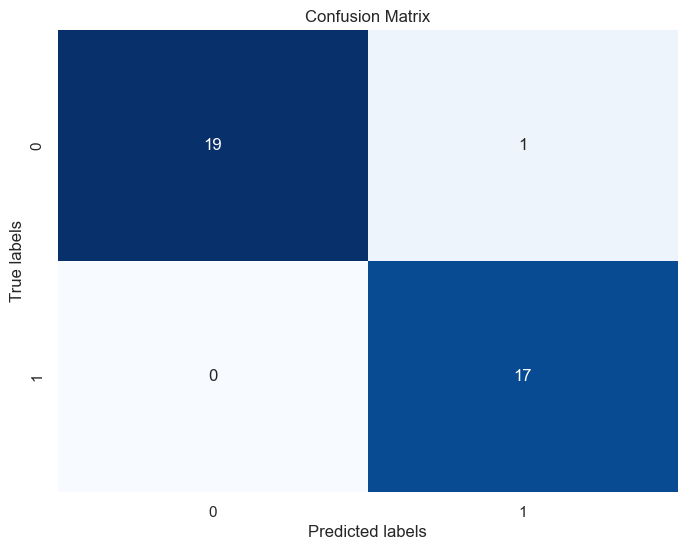

c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

Accuracy: [0.91891892 0.97297297 0.94444444 0.94444444 1.        ]
Average accuracy: 0.9561561561561562
{'weights': 'distance', 'n_neighbors': 7, 'metric': 'minkowski'}
0.9617117117117118
KNeighborsClassifier(n_neighbors=7, weights='distance')


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print the accuracy
print("Accuracy:", knn_accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

#now we implement cross-validation
# Perform k-fold cross-validation
cv_results = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')

# Print the results
print('Accuracy:', cv_results)
print('Average accuracy:', cv_results.mean())

#now we implement hyperparameter tuning
# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                    n_jobs=-1, cv=kfold, random_state=123)

# Fit the model
random_search.fit(X, y)

# Print the best parameters
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)
#now we implement the final mode

